# Overview

Validate and explore the data.  All learning about the data set should go here to onboard readers before reviewing specific notebooks that provide insights


## Data Dictionary

Data format up to and including `JC-202101-citibike-tripdata.csv` file:

```
"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"

```
Data format:

* Trip Duration (seconds)
* Start Time and Date
* Stop Time and Date
* Start Station Name
* End Station Name
* Station ID
* Station Lat/Long
* Bike ID
* User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
* Gender (Zero=unknown; 1=male; 2=female)
* Year of Birth


Data format including and after `JC-202102-citibike-tripdata.csv` file:

* Ride ID
* Rideable type
* Started at
* Ended at
* Start station name
* Start station ID
* End station name
* End station ID
* Start latitude
* Start longitude
* End latitude
* End Longitude
* Member or casual ride

The data format was determined using a simple grep command:
```
 grep -c "gender" data/*
```
 

In [23]:
import pandas as pd
import itertools
import networkx as nx
import matplotlib.pyplot as plt

In [118]:

year_months = list(itertools.chain(
    *[
        [f"{year}{str(month).zfill(2)}" for month in range(1,13)] 
        for year in range(2019,2020)]))
print(f"Using year months: {year_months}")

files = [f"data/JC-{year_month}-citibike-tripdata.csv" for year_month in year_months]

df = pd.concat((pd.read_csv(file) for file in files))
df_sample = df.head(1000)

Using year months: ['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912']


In [119]:
graph_df = df

start_nodes = list(graph_df['start station name'].unique())
end_nodes = list(graph_df['end station name'].unique())

nodes = list(set(start_nodes) | set(end_nodes))

edges = list(graph_df[['start station name', 'end station name']].itertuples(index=False, name=None))

edges = [item for item in edges if item[0] != item[1]]

print(f"nodes: {len(nodes)} edges: {len(edges)}")

weighted_edges = {}
for edge in edges:
    
    try:
        count = weighted_edges[edge]
    except KeyError:
        count = 0
    
    weighted_edges[edge] = count + 1

nodes: 120 edges: 387585


Standard Deviation: 428.4417164679985


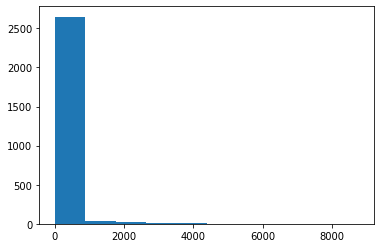

In [130]:
edge_counts = weighted_edges.values()

plt.hist(edge_counts)

from statistics import stdev
print(f"Standard Deviation: {stdev(edge_counts)}")

filtered_edges = { key:value for (key,value) in weighted_edges.items() if value > 428}

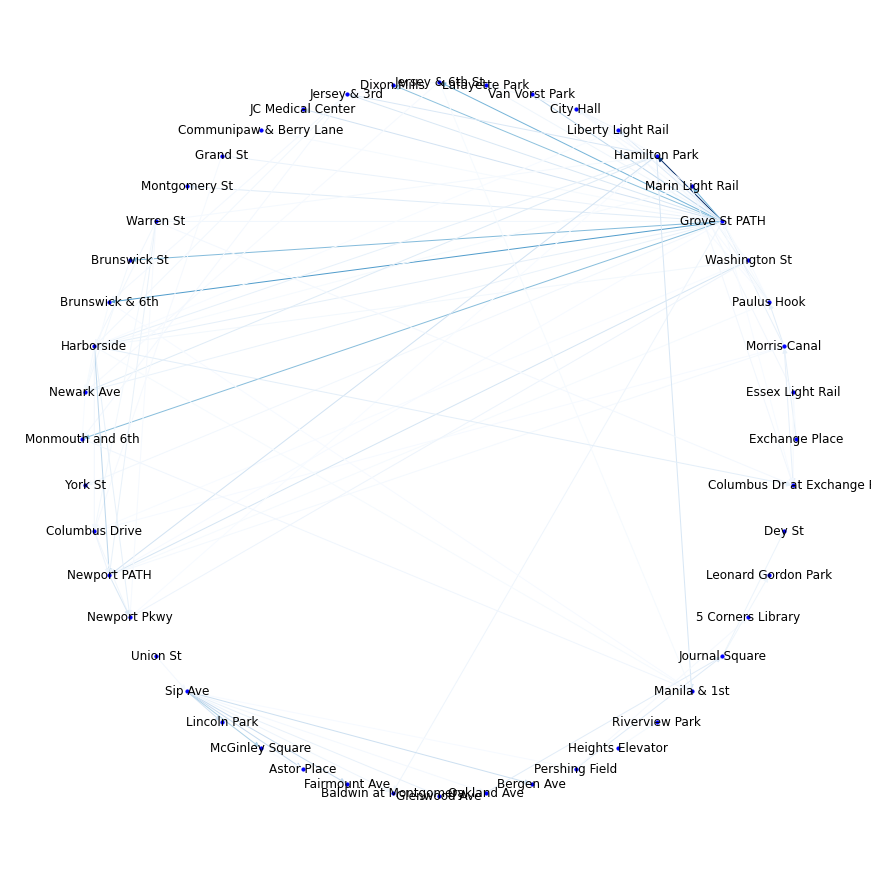

In [131]:
G = nx.Graph()
  
for weighted_edge in filtered_edges:
    weight=filtered_edges[weighted_edge]
    G.add_edge(weighted_edge[0], weighted_edge[1], weight=weight)

e,w = zip(*nx.get_edge_attributes(G,'weight').items())

plt.figure(1, figsize=(12,12))

nx.draw_circular(G,
                 edge_cmap=plt.cm.Blues,
                 node_color='b', 
                 edgelist=e, 
                 node_size=10,
                 edge_color=w,
                 with_labels=True,
                arrows=True)

plt.show()